<a href="https://colab.research.google.com/github/MARIBELCT2015/Data_Paises_No_Requieren_Visa/blob/main/Pa%C3%ADses_que_no_requieren_visa_de_Col.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maribel Cifuentes Torres.
Andes University -
2024

In [ ]:
## Importar librerías
import numpy as np # Estadisticas
import pandas as pd # Manupulación
import statsmodels.api as sm # Tratamiento

import matplotlib.pyplot as plt # Visualización
import matplotlib.font_manager # Visualización
from matplotlib import style # Visualización
style.use('ggplot') or plt.style.use('ggplot') # Estilo de gráfico ggplot

# sklearn : Nuestra libreria de metodologías de modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


In [ ]:
df = pd.read_csv(r'/content/visa.csv')
df.head()

,REGIÓN,OTROS TERRITORIOS,PAÍS,Localización,EXIGE VISA CORTA DURACIÓN,EXIGE VISA A PASAPORTE DE SERVICIO,EXIGE VISA A PASAPORTE OFICIAL,EXIGE VISA A PASAPORTE DIPLOMÁTICO,CONDICIONES ESPECIALES,Identificador,FECHA
0,EUROPA OCCIDENTAL,NO,LIECHTENSTEIN,"(47.166, 9.555373)",NO,NO,NO,NO,(N/A),106,12/06/2023
1,EUROPA ORIENTAL,NO,LITUANIA,"(55.169438, 23.881275)",NO,NO,NO,NO,(N/A),107,12/06/2023
2,EUROPA OCCIDENTAL,NO,LUXEMBURGO,"(49.815273, 6.129583)",NO,NO,NO,NO,(N/A),108,12/06/2023
3,EUROPA ORIENTAL,NO,MACEDONIA,"(41.608635, 21.745275)",SI,SI,SI,SI,(N/A),109,12/06/2023
4,AFRICA DEL SUR,NO,MADAGASCAR,"(-18.766947, 46.869107)",SI,SI,SI,SI,(N/A),110,12/06/2023


In [ ]:
# Tipos de objetos y datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   REGIÓN                              170 non-null    object
 1   OTROS TERRITORIOS                   170 non-null    object
 2   PAÍS                                170 non-null    object
 3   Localización                        170 non-null    object
 4   EXIGE VISA CORTA DURACIÓN           170 non-null    object
 5   EXIGE VISA A PASAPORTE DE SERVICIO  170 non-null    object
 6   EXIGE VISA A PASAPORTE OFICIAL      170 non-null    object
 7   EXIGE VISA A PASAPORTE DIPLOMÁTICO  170 non-null    object
 8   CONDICIONES ESPECIALES              170 non-null    object
 9   Identificador                       170 non-null    int64 
 10  FECHA                               170 non-null    object
dtypes: int64(1), object(10)
memory usage: 14.7+ KB


In [ ]:
## Dimensión de la base de datos
df.shape

(170, 11)

In [ ]:
## No hay datos duplicados
df.duplicated().sum()

0

In [ ]:
#cantidad de nulos
df.isnull().sum()

REGIÓN                                0
OTROS TERRITORIOS                     0
PAÍS                                  0
Localización                          0
EXIGE VISA CORTA DURACIÓN             0
EXIGE VISA A PASAPORTE DE SERVICIO    0
EXIGE VISA A PASAPORTE OFICIAL        0
EXIGE VISA A PASAPORTE DIPLOMÁTICO    0
CONDICIONES ESPECIALES                0
Identificador                         0
FECHA                                 0
dtype: int64

In [ ]:
df.describe(include = ["O"])

,REGIÓN,OTROS TERRITORIOS,PAÍS,Localización,EXIGE VISA CORTA DURACIÓN,EXIGE VISA A PASAPORTE DE SERVICIO,EXIGE VISA A PASAPORTE OFICIAL,EXIGE VISA A PASAPORTE DIPLOMÁTICO,CONDICIONES ESPECIALES,FECHA
count,170,170,170,170,170,170,170,170,170,170
unique,31,1,170,170,3,5,5,5,5,1
top,EUROPA OCCIDENTAL,NO,LIECHTENSTEIN,"(47.166, 9.555373)",NO,NO,NO,NO,(N/A),12/06/2023
freq,21,170,1,1,90,63,57,56,127,170


In [ ]:
df.tail(5)

,REGIÓN,OTROS TERRITORIOS,PAÍS,Localización,EXIGE VISA CORTA DURACIÓN,EXIGE VISA A PASAPORTE DE SERVICIO,EXIGE VISA A PASAPORTE OFICIAL,EXIGE VISA A PASAPORTE DIPLOMÁTICO,CONDICIONES ESPECIALES,Identificador,FECHA
165,ISLAS PACIFICO,NO,ISLAS SALOM�N,"(-9.64571, 160.156194)",NO,NO,NO,NO,(N/A),88,12/06/2023
166,ORIENTE MEDIO,NO,ISRAEL,"(31.046051, 34.851612)",NO,NO,NO,NO,(N/A),89,12/06/2023
167,AMERICA DEL SUR,NO,ARGENTINA,"(-38.416097, -63.616672)",NO,NO,NO,NO,(N/A),9,12/06/2023
168,EUROPA OCCIDENTAL,NO,ITALIA,"(41.87194, 12.56738)",NO,NO,NO,NO,(N/A),90,12/06/2023
169,AMERICA CARIBE,NO,JAMAICA,"(18.109581, -77.297508)",NO,NO,NO,NO,(N/A),91,12/06/2023


###¿Cuántos países exigen visa y cuántos no?

In [ ]:
## Conteo de la variable 'EXIGE VISA CORTA DURACIÓN'
df['EXIGE VISA CORTA DURACIÓN'].value_counts()

NO                            90
SI                            75
SI- CONDICIONES ESPECIALES     5
Name: EXIGE VISA CORTA DURACIÓN, dtype: int64

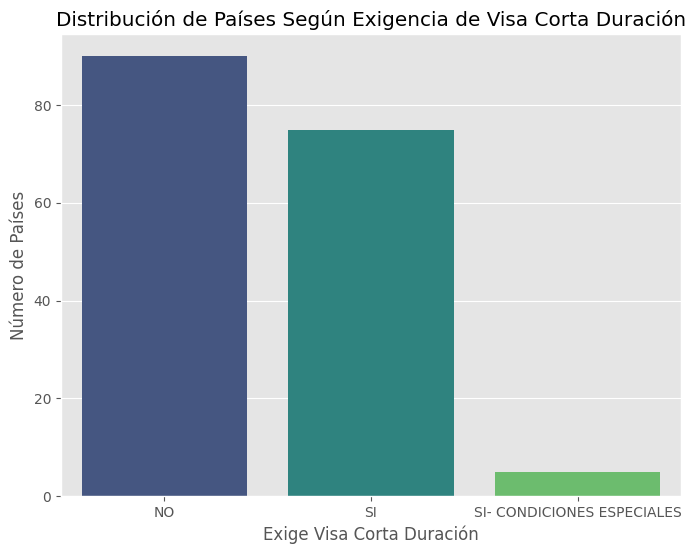

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar el número de países que exigen o no exigen visa corta duración
visa_counts = df['EXIGE VISA CORTA DURACIÓN'].value_counts()

# Visualizar la distribución
plt.figure(figsize=(8, 6))
sns.barplot(x=visa_counts.index, y=visa_counts.values, palette='viridis')
plt.title('Distribución de Países Según Exigencia de Visa Corta Duración')
plt.xlabel('Exige Visa Corta Duración')
plt.ylabel('Número de Países')
plt.show()


La mayoría de los países no exigen visa corta duración (90 países).
Hay 75 países que sí exigen visa corta duración.
5 países tienen condiciones especiales relacionadas con la exigencia de visa corta duración.

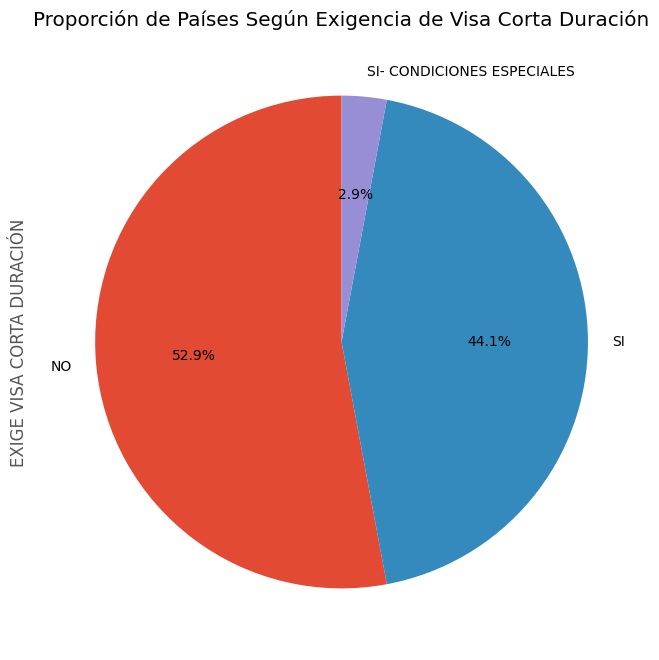

In [ ]:
# Visualizar la proporción de países que exigen o no exigen visa corta duración
plt.figure(figsize=(8, 8))
df['EXIGE VISA CORTA DURACIÓN'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Países Según Exigencia de Visa Corta Duración')
plt.show()


In [ ]:
## Conteo de la variable 'EXIGE VISA A PASAPORTE DE SERVICIO'
df['EXIGE VISA A PASAPORTE DE SERVICIO'].value_counts()

NO                            63
SI                            58
(NO REGISTRA)                 38
NO- ACUERDO ESPECIAL           8
SI- CONDICIONES ESPECIALES     3
Name: EXIGE VISA A PASAPORTE DE SERVICIO, dtype: int64

La mayoría de los países (63) no exigen visa para pasaporte de servicio.
Hay 58 países que sí exigen visa para pasaporte de servicio.
38 países no registran información sobre esta exigencia.
8 países tienen un acuerdo especial que les exige visa para pasaporte de servicio.
3 países tienen condiciones especiales relacionadas con la exigencia de visa para pasaporte de servicio.

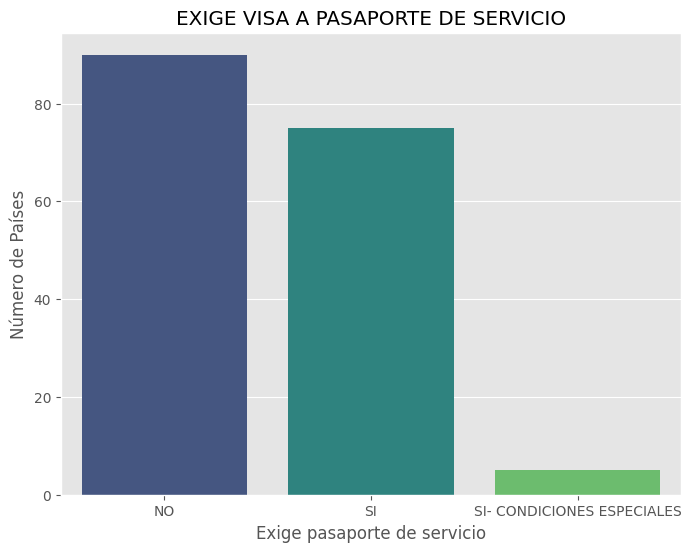

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar el número de países que exigen o no exigen visa corta duración
pasaporte_servicio = df['EXIGE VISA A PASAPORTE DE SERVICIO'].value_counts()

# Visualizar la distribución
plt.figure(figsize=(8, 6))
sns.barplot(x=visa_counts.index, y=visa_counts.values, palette='viridis')
plt.title('EXIGE VISA A PASAPORTE DE SERVICIO')
plt.xlabel('Exige pasaporte de servicio')
plt.ylabel('Número de Países')
plt.show()

In [ ]:
## Conteo de la variable 'EXIGE VISA A PASAPORTE DIPLOMÁTICO'
df['EXIGE VISA A PASAPORTE DIPLOMÁTICO'].value_counts()

NO                            56
SI                            56
(NO REGISTRA)                 38
NO- ACUERDO ESPECIAL          19
SI- CONDICIONES ESPECIALES     1
Name: EXIGE VISA A PASAPORTE DIPLOMÁTICO, dtype: int64

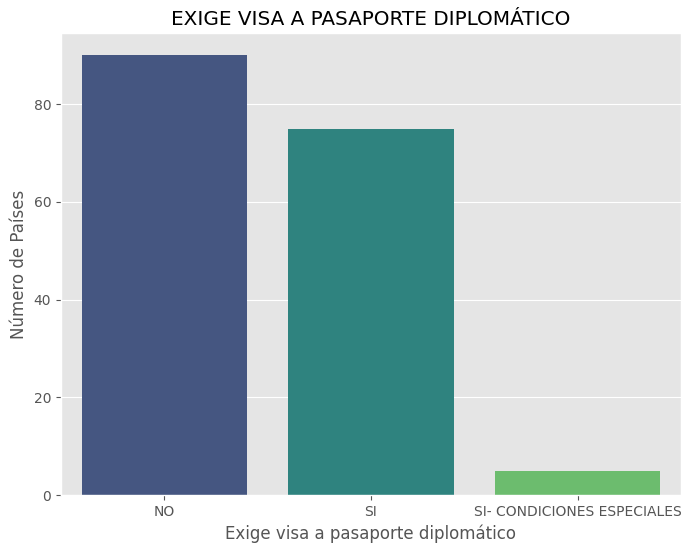

In [ ]:
# Contar el número de países que exigen o no exigen visa corta duración
diplomatico = df['EXIGE VISA A PASAPORTE DIPLOMÁTICO'].value_counts()

# Visualizar la distribución
plt.figure(figsize=(8, 6))
sns.barplot(x=visa_counts.index, y=visa_counts.values, palette='viridis')
plt.title('EXIGE VISA A PASAPORTE DIPLOMÁTICO')
plt.xlabel('Exige visa a pasaporte diplomático')
plt.ylabel('Número de Países')
plt.show()

In [ ]:
## Conteo de la variable 'CONDICIONES ESPECIALES'
df['CONDICIONES ESPECIALES'].value_counts()

(N/A)                                                                                                                                                                                                                                           127
(NO REGISTRA)                                                                                                                                                                                                                                    38
NO EXIGE PARA TITULARES DE VISA O RESIDENCIA DE EE UU O SCHENGEN CON VIGENCIA M�NIMA DE 180 D�AS                                                                                                                                                  2
NO EXIGE VISA A TITULARES DE VISA O RESIDENCIA DE EE UU O SCHENGEN CON VIGENCIA M�NIMA DE 180 D�AS                                                                                                                                                2
PARA NICARAG�ENSES QUE A

In [ ]:
df[["EXIGE VISA CORTA DURACIÓN", "EXIGE VISA A PASAPORTE DE SERVICIO"]].groupby(["EXIGE VISA CORTA DURACIÓN", "EXIGE VISA A PASAPORTE DE SERVICIO"]).count()

Empty DataFrame
Columns: []
Index: [(NO, (NO REGISTRA)), (NO, NO), (NO, NO- ACUERDO ESPECIAL), (NO, SI), (SI, (NO REGISTRA)), (SI, NO), (SI, NO- ACUERDO ESPECIAL), (SI, SI), (SI- CONDICIONES ESPECIALES, NO), (SI- CONDICIONES ESPECIALES, SI- CONDICIONES ESPECIALES)]

In [ ]:
pd.crosstab(df["EXIGE VISA CORTA DURACIÓN"], df["EXIGE VISA A PASAPORTE DE SERVICIO"])

EXIGE VISA A PASAPORTE DE SERVICIO,(NO REGISTRA),NO,NO- ACUERDO ESPECIAL,SI,SI- CONDICIONES ESPECIALES
EXIGE VISA CORTA DURACIÓN,,,,,
NO,24,59,4,3,0
SI,14,2,4,55,0
SI- CONDICIONES ESPECIALES,0,2,0,0,3


In [ ]:
list(df['EXIGE VISA A PASAPORTE OFICIAL'].value_counts())

[57, 56, 38, 18, 1]

In [ ]:
list(df['EXIGE VISA A PASAPORTE DE SERVICIO'].value_counts())

[63, 58, 38, 8, 3]

In [ ]:
len(df['EXIGE VISA A PASAPORTE OFICIAL'].unique())

5

In [ ]:
## Visualizar las columnas
df.columns

Index(['REGIÓN', 'OTROS TERRITORIOS', 'PAÍS', 'Localización',
       'EXIGE VISA CORTA DURACIÓN', 'EXIGE VISA A PASAPORTE DE SERVICIO',
       'EXIGE VISA A PASAPORTE OFICIAL', 'EXIGE VISA A PASAPORTE DIPLOMÁTICO',
       'CONDICIONES ESPECIALES', 'Identificador', 'FECHA'],
      dtype='object')

## ¿Qué países son más accesibles para viajes de negocios y cuáles presentan más restricciones?

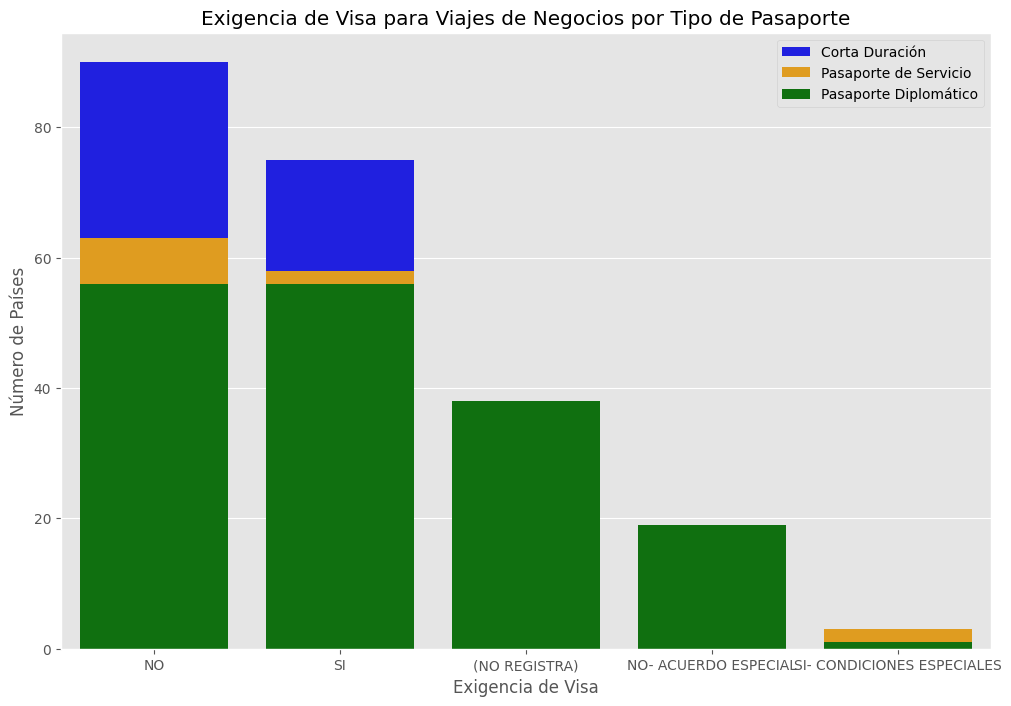

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las columnas relevantes
columnas_pasaportes = [
    'PAÍS',
    'EXIGE VISA CORTA DURACIÓN',
    'EXIGE VISA A PASAPORTE DE SERVICIO',
    'EXIGE VISA A PASAPORTE DIPLOMÁTICO'
]

df_pasaportes = df[columnas_pasaportes]

# Contar la cantidad de países que exigen visa para cada tipo de pasaporte
count_corta_duracion = df_pasaportes['EXIGE VISA CORTA DURACIÓN'].value_counts()
count_servicio = df_pasaportes['EXIGE VISA A PASAPORTE DE SERVICIO'].value_counts()
count_diplomatico = df_pasaportes['EXIGE VISA A PASAPORTE DIPLOMÁTICO'].value_counts()

# Crear un gráfico de barras para visualizar la información
plt.figure(figsize=(12, 8))
sns.barplot(x=count_corta_duracion.index, y=count_corta_duracion.values, color='blue', label='Corta Duración')
sns.barplot(x=count_servicio.index, y=count_servicio.values, color='orange', label='Pasaporte de Servicio')
sns.barplot(x=count_diplomatico.index, y=count_diplomatico.values, color='green', label='Pasaporte Diplomático')

plt.title('Exigencia de Visa para Viajes de Negocios por Tipo de Pasaporte')
plt.xlabel('Exigencia de Visa')
plt.ylabel('Número de Países')
plt.legend()
plt.show()
